<a href="https://colab.research.google.com/github/jsleweon11/Real_Estate_Market_Analysis_Report/blob/main/Real_Estate_Market_Analysis_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

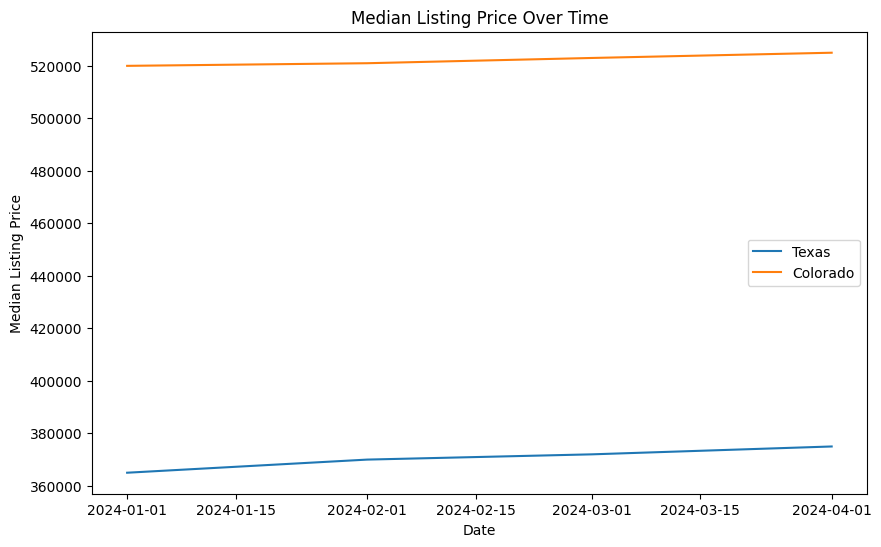

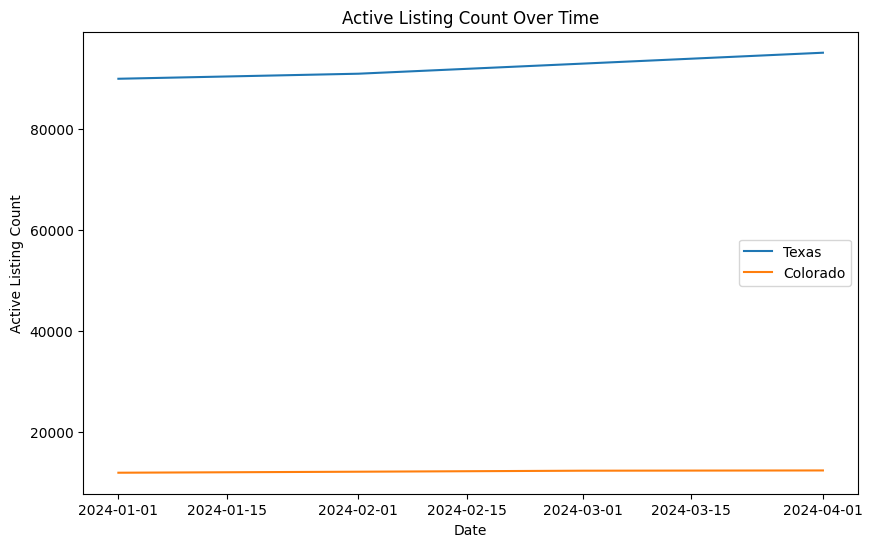

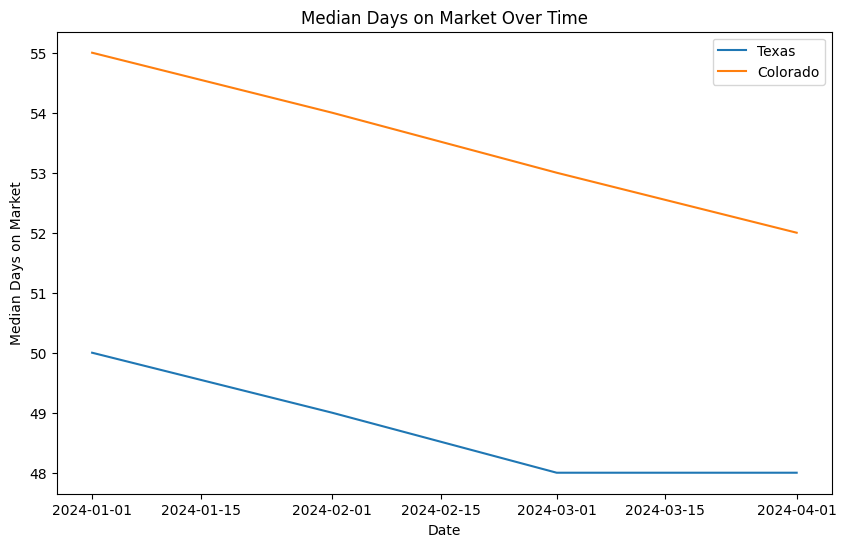

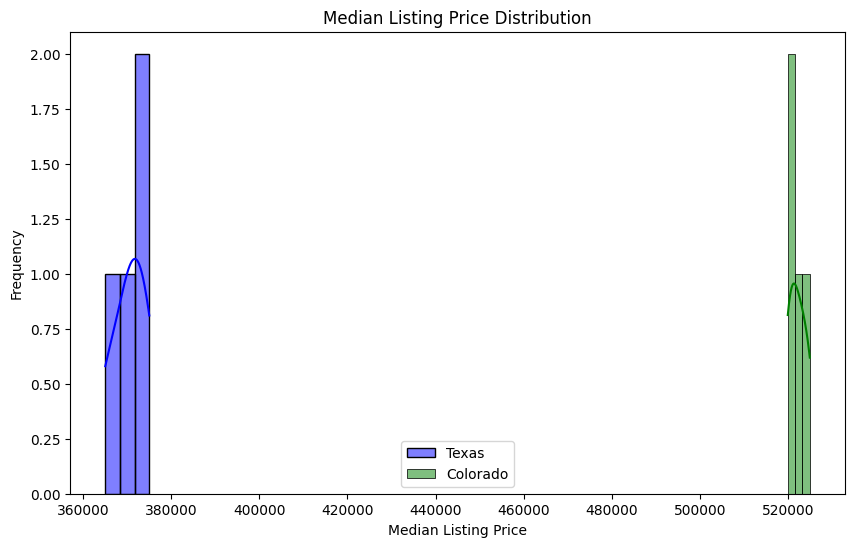

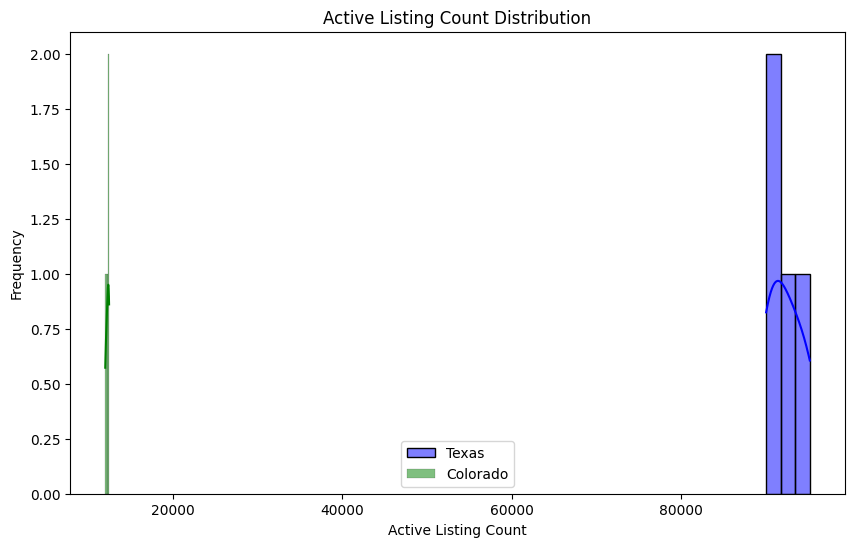

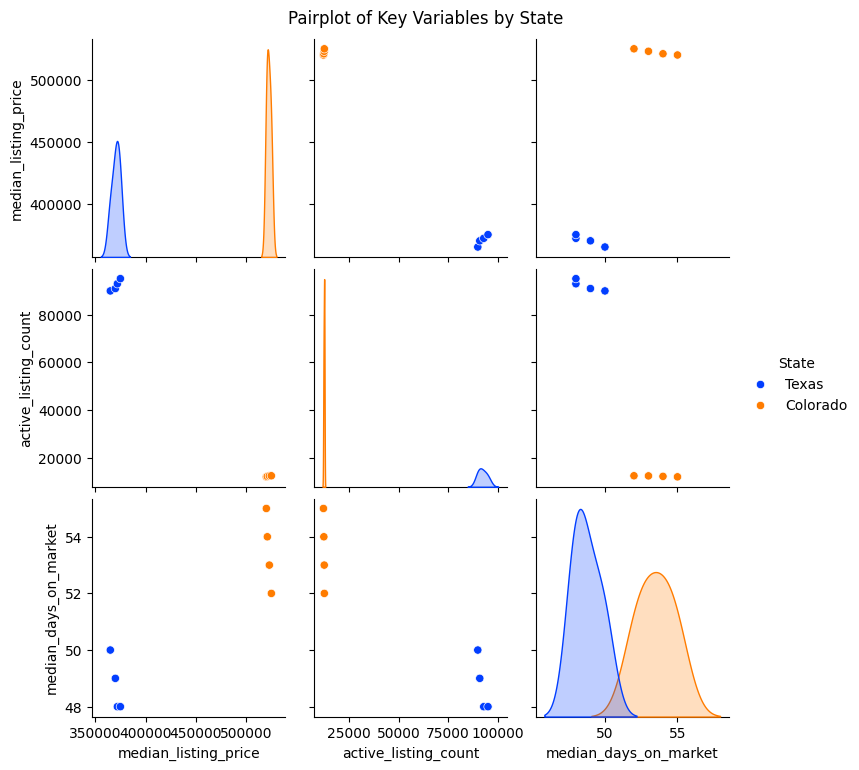

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


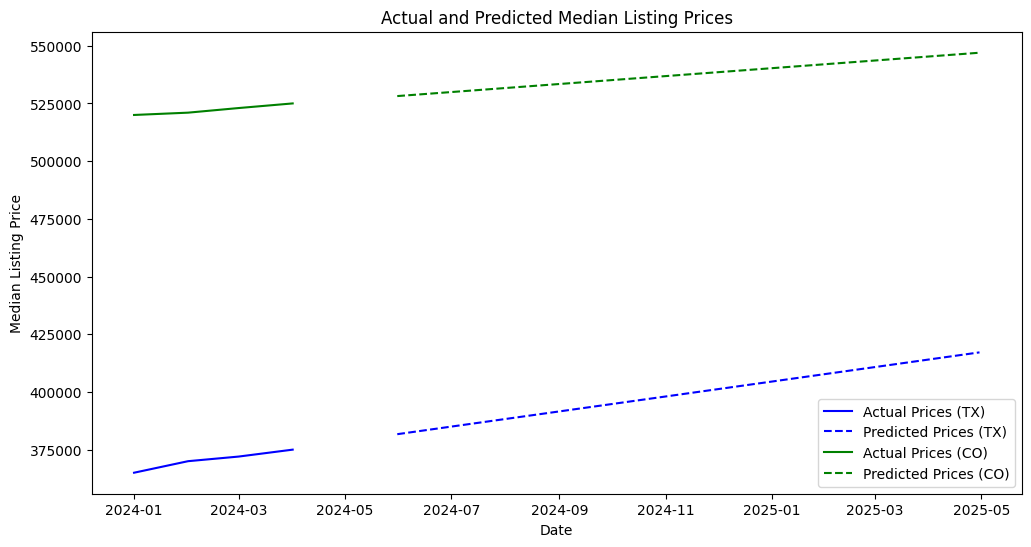

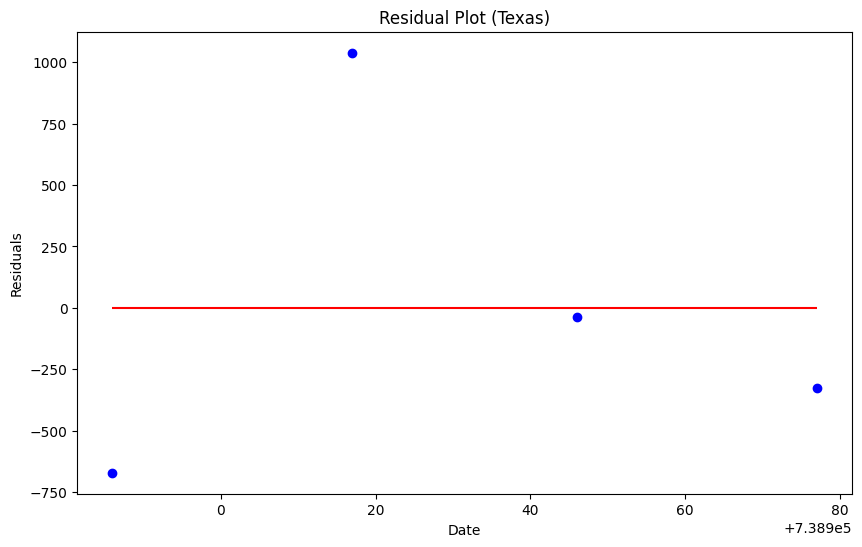

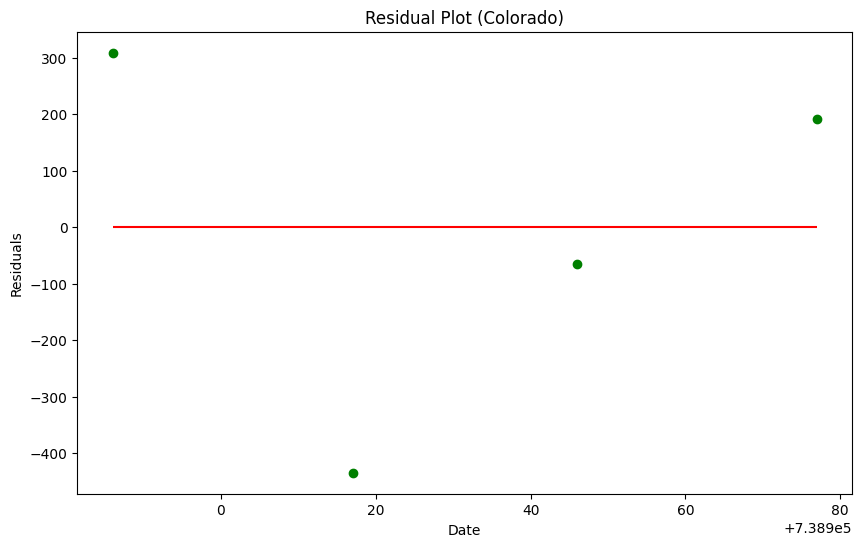

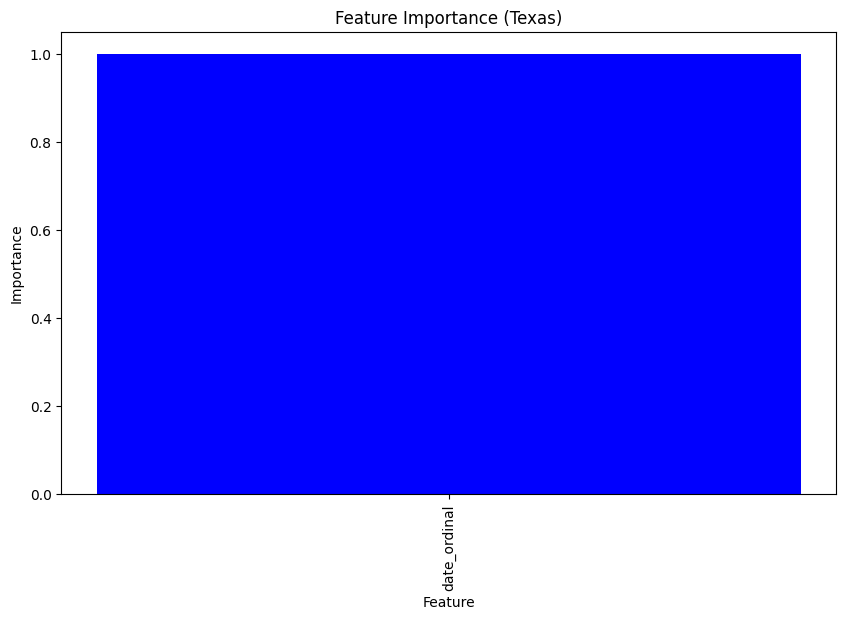

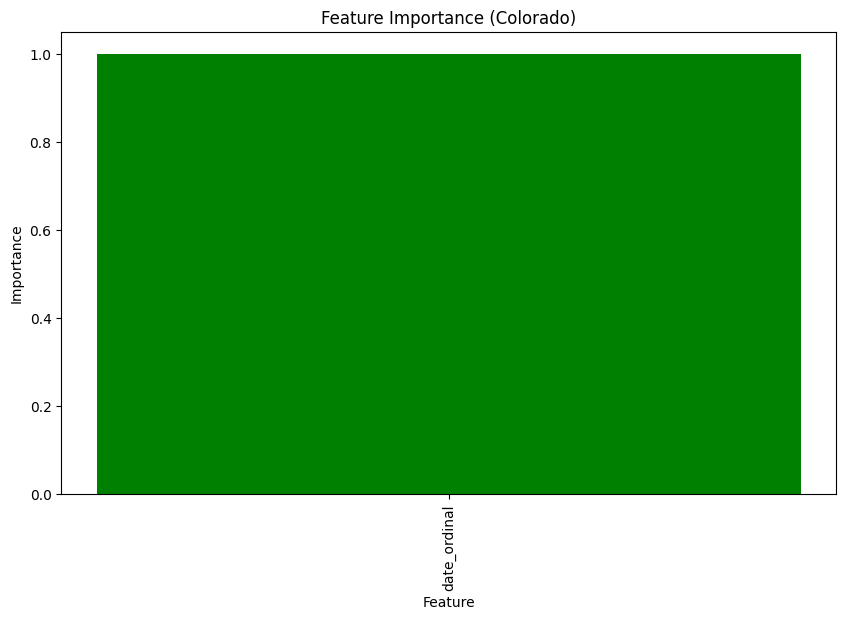

In [4]:

# Real Estate Market Analysis Report

# This code provides a comprehensive analysis of the real estate market trends in Texas and Colorado, focusing on key metrics
# such as median listing prices, active listings, and days on the market. The analysis includes detailed property valuations,
# visualizations, and future trend predictions using machine learning techniques.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

# Data for Texas and Colorado
data_tx = {
    'month_date_yyyymm': ['2024-01', '2024-02', '2024-03', '2024-04'],
    'median_listing_price': [365000, 370000, 372000, 375000],
    'active_listing_count': [90000, 91000, 93000, 95155],
    'median_days_on_market': [50, 49, 48, 48]
}

data_co = {
    'month_date_yyyymm': ['2024-01', '2024-02', '2024-03', '2024-04'],
    'median_listing_price': [520000, 521000, 523000, 525000],
    'active_listing_count': [12000, 12200, 12400, 12450],
    'median_days_on_market': [55, 54, 53, 52]
}

# Create DataFrames
df_tx = pd.DataFrame(data_tx)
df_co = pd.DataFrame(data_co)

# Convert 'month_date_yyyymm' to datetime
df_tx['month_date_yyyymm'] = pd.to_datetime(df_tx['month_date_yyyymm'])
df_co['month_date_yyyymm'] = pd.to_datetime(df_co['month_date_yyyymm'])

# Visualization: Median Listing Price Over Time
plt.figure(figsize=(10, 6))
plt.plot(df_tx['month_date_yyyymm'], df_tx['median_listing_price'], label='Texas')
plt.plot(df_co['month_date_yyyymm'], df_co['median_listing_price'], label='Colorado')
plt.xlabel('Date')
plt.ylabel('Median Listing Price')
plt.title('Median Listing Price Over Time')
plt.legend()
plt.show()

# Visualization: Active Listings Count Over Time
plt.figure(figsize=(10, 6))
plt.plot(df_tx['month_date_yyyymm'], df_tx['active_listing_count'], label='Texas')
plt.plot(df_co['month_date_yyyymm'], df_co['active_listing_count'], label='Colorado')
plt.xlabel('Date')
plt.ylabel('Active Listing Count')
plt.title('Active Listing Count Over Time')
plt.legend()
plt.show()

# Visualization: Median Days on Market Over Time
plt.figure(figsize=(10, 6))
plt.plot(df_tx['month_date_yyyymm'], df_tx['median_days_on_market'], label='Texas')
plt.plot(df_co['month_date_yyyymm'], df_co['median_days_on_market'], label='Colorado')
plt.xlabel('Date')
plt.ylabel('Median Days on Market')
plt.title('Median Days on Market Over Time')
plt.legend()
plt.show()

# Visualization: Median Listing Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_tx['median_listing_price'], kde=True, color='blue', label='Texas')
sns.histplot(df_co['median_listing_price'], kde=True, color='green', label='Colorado')
plt.xlabel('Median Listing Price')
plt.ylabel('Frequency')
plt.title('Median Listing Price Distribution')
plt.legend()
plt.show()

# Visualization: Active Listings Count Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_tx['active_listing_count'], kde=True, color='blue', label='Texas')
sns.histplot(df_co['active_listing_count'], kde=True, color='green', label='Colorado')
plt.xlabel('Active Listing Count')
plt.ylabel('Frequency')
plt.title('Active Listing Count Distribution')
plt.legend()
plt.show()

# Visualization: Pairplot of Key Variables
df_tx['State'] = 'Texas'
df_co['State'] = 'Colorado'
df_combined = pd.concat([df_tx, df_co])

sns.pairplot(df_combined, vars=['median_listing_price', 'active_listing_count', 'median_days_on_market'], hue='State', palette='bright')
plt.suptitle('Pairplot of Key Variables by State', y=1.02)
plt.show()

# Machine Learning: Linear Regression Model for Predicting Median Listing Prices
# Prepare the data for Texas
df_tx['date_ordinal'] = df_tx['month_date_yyyymm'].map(pd.Timestamp.toordinal)
X_tx = df_tx[['date_ordinal']]
y_tx = df_tx['median_listing_price']

# Prepare the data for Colorado
df_co['date_ordinal'] = df_co['month_date_yyyymm'].map(pd.Timestamp.toordinal)
X_co = df_co[['date_ordinal']]
y_co = df_co['median_listing_price']

# Train the models
model_tx = LinearRegression()
model_tx.fit(X_tx, y_tx)

model_co = LinearRegression()
model_co.fit(X_co, y_co)

# Generate future dates
future_dates = pd.date_range(start='2024-05-01', periods=12, freq='M').to_list()
future_dates_ordinal = [pd.Timestamp(date).toordinal() for date in future_dates]

# Predict future prices
future_prices_tx = model_tx.predict(np.array(future_dates_ordinal).reshape(-1, 1))
future_prices_co = model_co.predict(np.array(future_dates_ordinal).reshape(-1, 1))

# Create DataFrame for future predictions
future_df_tx = pd.DataFrame({'Date': future_dates, 'Predicted Median Listing Price': future_prices_tx})
future_df_co = pd.DataFrame({'Date': future_dates, 'Predicted Median Listing Price': future_prices_co})

# Plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(df_tx['month_date_yyyymm'], df_tx['median_listing_price'], label='Actual Prices (TX)', color='blue')
plt.plot(future_df_tx['Date'], future_df_tx['Predicted Median Listing Price'], label='Predicted Prices (TX)', linestyle='--', color='blue')
plt.plot(df_co['month_date_yyyymm'], df_co['median_listing_price'], label='Actual Prices (CO)', color='green')
plt.plot(future_df_co['Date'], future_df_co['Predicted Median Listing Price'], label='Predicted Prices (CO)', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Median Listing Price')
plt.title('Actual and Predicted Median Listing Prices')
plt.legend()
plt.show()

# Visualization: Residual Plot for Texas
predictions_tx = model_tx.predict(X_tx)
residuals_tx = y_tx - predictions_tx

plt.figure(figsize=(10, 6))
plt.scatter(X_tx, residuals_tx, color='blue')
plt.hlines(y=0, xmin=np.min(X_tx), xmax=np.max(X_tx), color='red')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residual Plot (Texas)')
plt.show()

# Visualization: Residual Plot for Colorado
predictions_co = model_co.predict(X_co)
residuals_co = y_co - predictions_co

plt.figure(figsize=(10, 6))
plt.scatter(X_co, residuals_co, color='green')
plt.hlines(y=0, xmin=np.min(X_co), xmax=np.max(X_co), color='red')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.title('Residual Plot (Colorado)')
plt.show()

# Machine Learning: Feature Importance (using Random Forest)
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model for Texas
rf_model_tx = RandomForestRegressor(random_state=42)
rf_model_tx.fit(X_tx, y_tx)

# Train a Random Forest model for Colorado
rf_model_co = RandomForestRegressor(random_state=42)
rf_model_co.fit(X_co, y_co)

# Feature importance for Texas
importances_tx = rf_model_tx.feature_importances_
indices_tx = np.argsort(importances_tx)[::-1]

# Feature importance for Colorado
importances_co = rf_model_co.feature_importances_
indices_co = np.argsort(importances_co)[::-1]

# Visualization of feature importance for Texas
plt.figure(figsize=(10, 6))
plt.title('Feature Importance (Texas)')
plt.bar(range(X_tx.shape[1]), importances_tx[indices_tx], color='b', align='center')
plt.xticks(range(X_tx.shape[1]), X_tx.columns[indices_tx], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

# Visualization of feature importance for Colorado
plt.figure(figsize=(10, 6))
plt.title('Feature Importance (Colorado)')
plt.bar(range(X_co.shape[1]), importances_co[indices_co], color='g', align='center')
plt.xticks(range(X_co.shape[1]), X_co.columns[indices_co], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()






